# PROJET 7 : Effectuez une prédiction de revenu / CODE en R 

## Import des données

In [1]:
#import librairies

library(ggplot2)
options(repr.plot.width=6, repr.plot.height=4)

library(tidyr)
library(tidyverse)
library(dplyr)
library(zoo)
library(ineq)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v purrr   0.3.2       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [2]:
#import data World Income Distribution
data_0 <- read.table("data-projet7.csv", sep=",", header=TRUE, dec = ',')

#import des indices de Gini, World Bank
indices_gini <- read.table("indices_gini.csv", sep=",", header=TRUE, skip = 4)

#import des populations par pays, World Bank
population <- read.table("population.csv", sep=",", header=TRUE, skip = 4)

### Nettoyage et traitement des données

In [3]:
#on reshape le df data pour avoir une ligne par pays et les quantiles en colonnes
data = merge(select(data_0, country, year_survey, nb_quantiles, gdpppp),
              dcast(data_0, country ~ quantile, value.var="income"),
              by.x="country", by.y="country")
data = data[!duplicated(data), ]
head(data)

,country,year_survey,nb_quantiles,gdpppp,1,2,3,4,5,6,...,91,92,93,94,95,96,97,98,99,100
1,ALB,2008,100,7297,728.8980,916.6623,1010.9160,1086.9078,1132.6997,1171.1412,...,4965.685,5144.883,5348.793,5619.445,5860.917,6231.100,6822.318,7775.891,9351.751,17754.324
101,ARG,2008,100,13220,254.0894,470.5015,623.4542,734.9746,832.3185,918.4080,...,12110.668,12821.353,13450.862,14296.399,15406.059,16618.873,18226.730,20528.305,24444.950,43669.242
201,ARM,2008,100,5611,366.6178,535.3273,611.6456,658.3394,690.8471,721.9100,...,2653.580,2738.507,2832.991,2932.561,3062.856,3229.554,3466.665,3758.602,4320.290,6566.159
301,AUT,2008,100,36193,2958.0764,4893.4673,5459.6490,5923.5854,6380.2780,6779.2646,...,27365.670,28057.947,29231.506,30725.930,32304.807,33914.105,36080.902,39450.555,44950.312,72216.680
401,AZE,2008,100,8101,397.5398,597.7732,705.4700,785.5261,841.7524,889.2646,...,4126.079,4296.922,4450.074,4641.496,4917.442,5283.547,5802.638,6366.059,7459.711,12023.727
501,BEL,2008,100,33561,2421.9417,3812.5588,4534.7540,5019.0020,5442.7627,5789.4575,...,24380.990,25058.873,25735.262,26490.363,27972.418,29376.928,31054.926,34044.560,39844.758,83104.470


In [4]:
#on regarde le summary des données pour repérer les valeurs manquantes ou aberrantes
summary(data_0)

    country       year_survey      quantile      nb_quantiles
 ALB    :  100   Min.   :2004   Min.   :  1.0   Min.   :100  
 ARG    :  100   1st Qu.:2008   1st Qu.: 25.5   1st Qu.:100  
 ARM    :  100   Median :2008   Median : 51.0   Median :100  
 AUT    :  100   Mean   :2008   Mean   : 50.5   Mean   :100  
 AZE    :  100   3rd Qu.:2008   3rd Qu.: 75.5   3rd Qu.:100  
 BEL    :  100   Max.   :2011   Max.   :100.0   Max.   :100  
 (Other):10999                                               
     income              gdpppp       
 Min.   :    16.72   Min.   :    303  
 1st Qu.:   900.69   1st Qu.:   2576  
 Median :  2403.24   Median :   7560  
 Mean   :  6069.22   Mean   :  50221  
 3rd Qu.:  7515.42   3rd Qu.:  18773  
 Max.   :176928.55   Max.   :4300332  
                     NA's   :200      

In [5]:
#on repère les valeurs manquantes
data[rowSums(is.na(data)) > 0,]

,country,year_survey,nb_quantiles,gdpppp,1,2,3,4,5,6,...,91,92,93,94,95,96,97,98,99,100
6201,LTU,2008,100,17571,566.3453,1147.0587,1490.8408,1746.5715,1842.9542,1925.8641,...,11553.607,12073.023,12520.692,13091.254,13752.734,14597.036,15659.008,17883.877,22551.170,38836.530
9000,PSE,2009,100,NA,195.2899,264.3653,301.4467,329.8339,348.7649,366.7108,...,2078.602,2170.692,2267.392,2409.633,2568.689,2763.885,3077.833,3449.222,4165.997,6343.876
11300,XKX,2008,100,NA,437.8937,508.1713,591.8282,668.0000,730.4022,763.9098,...,3919.950,4119.839,4319.009,4500.839,4749.424,5155.365,5689.529,6233.739,7366.677,7609.576


In [6]:
#on ajoute manuellement les valeurs gdp ppp pour la palestine et le kosovo. Sources : World Bank 
#XKX : 3255 (2008)
#PSE : 1858 (2008)

data[data$country == 'PSE', 'gdpppp'] <- 1858
data[data$country == 'PSE', 'year_survey'] <- 2008
data[data$country == 'XKX', 'gdpppp'] <- 3255

In [7]:
# recherche valeur manquante pour LTU
which(is.na(data[rowSums(is.na(data)) > 0,])) #on repère la colonne où se trouve le NA

[1] 45

In [8]:
#affichage du NA
data[data$country == 'LTU', 44:46]

,40,41,42
6201,4868.451,NA,4895.831


- Pour imputer la valeur du quantile manquant, on se base sur les autres pays en calculant la distance moyenne du 41ème quantile entre le 40ème et le 42ème quantile :

In [9]:
df1 <- data[data$country != 'LTU',44:46]
a <- df1['41'] - df1['40'] # écart entre le 40ème quantile et le 41ème
b <- df1['42'] - df1['40'] # écart entre le 40ème quantile et le 42ème
c <- a/b
dist_quant <- mean(c[,1]) #distance moyenne du 41ème quantile

#on applique ce rapport pour LTU
data[data$country == 'LTU', 45] <- data[data$country == 'LTU', 44] +
                                ((data[data$country == 'LTU', 46] - data[data$country == 'LTU', 44]) * dist_quant)
data[data$country == 'LTU', 44:46]

,40,41,42
6201,4868.451,4881.698,4895.831


In [10]:
#verification doublons
duplicated(data)
#il n'y a pas de pays en double

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [11]:
#valeurs aberrantes

#affichage des plus grandes valeurs de gdpppp
head(data[order(-data$gdpppp),])

,country,year_survey,nb_quantiles,gdpppp,1,2,3,4,5,6,...,91,92,93,94,95,96,97,98,99,100
3301,FJI,2008,100,4300332,308.1733,384.3323,436.5926,486.8144,520.1972,556.573,...,3941.235,4182.607,4409.872,4695.861,5062.31,5481.082,6205.614,7265.126,9553.192,22161.59
6300,LUX,2008,100,73127,5780.8374,7315.2686,7891.2456,8312.0310,8945.6380,9524.440,...,42178.290,43667.960,46151.125,48686.797,51153.31,53724.630,58382.312,65280.220,77673.370,114823.68
8100,NOR,2008,100,49070,3520.2615,5978.4146,7153.7964,8225.6890,9013.9210,9700.204,...,35163.880,36132.990,37272.633,38402.668,39994.40,41779.010,44359.490,48223.797,55106.970,120354.22
11000,USA,2008,100,43261,663.4761,1698.0868,2439.7354,3054.2478,3627.5483,4101.936,...,50866.360,53313.960,56233.740,59764.703,64053.35,69926.370,77634.820,88482.840,106765.260,176928.55
4601,IRL,2008,100,39268,2819.1350,4758.8110,5422.5990,5861.0750,6226.1323,6452.138,...,29818.186,30804.588,31831.572,32864.824,34140.41,36361.387,39196.190,44047.258,52114.543,96758.68
8000,NLD,2008,100,38065,2558.8208,4940.7476,5605.4570,6155.4727,6663.1978,6987.211,...,29142.080,30064.287,31020.140,32206.814,33726.95,35854.310,38490.785,43026.030,52226.574,97551.00


In [12]:
#on corrige la valeur anormale de gdpppp pour FJI (4168, source World Bank)
data[data$country == 'FJI', 'gdpppp'] = 4168

In [13]:
#income
head(data[order(-data['100']),])

,country,year_survey,nb_quantiles,gdpppp,1,2,3,4,5,6,...,91,92,93,94,95,96,97,98,99,100
11000,USA,2008,100,43261,663.4761,1698.087,2439.735,3054.248,3627.548,4101.936,...,50866.36,53313.96,56233.74,59764.70,64053.35,69926.37,77634.82,88482.84,106765.26,176928.5
4901,ISL,2008,100,36527,5191.9683,8185.872,9188.146,10159.227,10884.475,11404.939,...,42450.73,44106.19,46007.63,48177.18,50764.23,54079.08,58772.38,67783.48,84655.52,160645.3
3501,GBR,2008,100,34048,1416.5803,3946.322,4897.456,5660.992,6283.235,6774.140,...,37948.42,39533.49,41402.75,43545.33,45760.52,48890.82,52429.48,56776.50,68247.45,141565.2
1501,CAN,2008,100,35895,122.4248,1692.514,2715.054,3541.338,4237.815,4862.758,...,42305.15,43975.58,45619.87,47541.62,50099.02,53247.78,57365.30,62962.47,73659.53,133454.8
3401,FRA,2008,100,30357,2958.3040,4412.675,4939.635,5422.917,5906.538,6263.426,...,31220.95,32203.81,33657.95,35429.94,37264.07,39873.51,43693.04,49489.58,60758.61,122775.2
8100,NOR,2008,100,49070,3520.2615,5978.415,7153.796,8225.689,9013.921,9700.204,...,35163.88,36132.99,37272.63,38402.67,39994.40,41779.01,44359.49,48223.80,55106.97,120354.2


#### Ajout des données de population

In [14]:
#ajout données population 2008
names(population)[names(population) == "Country.Code"] <- "country" #on renomme la colonne pays

#on merge le df data avec la colonne population 2008
data <- merge(x = data, y = select(population, country, X2008), by = "country", all.x = TRUE)

#on recupère la valeur de la pop mondiale en 2008
pop_tot_2008 <- population[population$country == 'WLD', 'X2008']

In [15]:
#recherche valeurs manquantes après ajout population
data[rowSums(is.na(data)) > 0,]

,country,year_survey,nb_quantiles,gdpppp,1,2,3,4,5,6,...,92,93,94,95,96,97,98,99,100,X2008
106,TWN,2008,100,25342,3477.18,4740.264,5331.301,5761.658,6093.202,6406.441,...,30165.46,31731.54,33315.65,35418.75,38123.46,41663.79,46650.58,54016.99,83540.05,NA


In [16]:
#on rajoute manuellement la population 2008 pour TWN (source : countryeonomy.com)
data[data$country == 'TWN', 'X2008'] <- 23037000

#on renomme la colonne population
names(data)[names(data) == "X2008"] <- "pop_2008"

#### Ajout données Gini

In [17]:
#ajout indices gini

#on renomme la colonne pays du df indices_gini
names(indices_gini)[names(indices_gini) == "Country.Code"] <- "country"

#on crée une colonne avec la dernière valeur non nulle de l'indice Gini pour chaque pays
df_last_gini <- data.frame(t(apply(select(indices_gini, (1:63)), 1, na.locf)))
df_last_gini <- select(df_last_gini, country, X2018)
names(df_last_gini)[names(df_last_gini) == "X2018"] <- "last_gini" #remplacement nom colonne
df_last_gini[df_last_gini == "SI.POV.GINI"]<- NA #on remplace les valeurs non numériques (pas de valeurs pour ces pays)
df_last_gini$last_gini <- as.numeric(as.character(df_last_gini$last_gini)) #on transforme la colonne en colonne numeric

#on merge le df principal avec le df_last_gini
data <- merge(x = data, y = df_last_gini, by = "country", all.x = TRUE)
data$country <- as.character(data$country)
#on repère les valeurs d'indice gini manquantes
data[rowSums(is.na(data)) > 0,]

,country,year_survey,nb_quantiles,gdpppp,1,2,3,4,5,6,...,93,94,95,96,97,98,99,100,pop_2008,last_gini
58,KHM,2008,100,1802,345.875,437.7456,481.9244,514.4737,540.4199,567.5325,...,2833.12,2989.611,3181.452,3425.024,3699.999,4184.605,4790.812,7375.561,13883834,NA
106,TWN,2008,100,25342,3477.180,4740.2637,5331.3013,5761.6577,6093.2017,6406.4414,...,31731.54,33315.652,35418.754,38123.460,41663.790,46650.582,54016.992,83540.055,23037000,NA


In [18]:
#on calcule manuellement les indices de Gini pour KHM et TWN à partir des quantiles de revenu

#on crée un df contenant uniquement les quantiles pour chaque pays
df_quantiles <- subset(data, select = -c(year_survey, nb_quantiles, gdpppp, pop_2008, last_gini) ) #on selectionne les pays et les quantiles dans le df initial

#on calcule manuellement les indices de gini (fonction Gini de la librarie 'ineq')
#KHM
khm <- df_quantiles[df_quantiles$country == 'KHM']
khm_gini <- round(Gini(t(khm)) * 100, 1)

#TWN
twn <- df_quantiles[df_quantiles['country'] == 'TWN',]
twn <-subset(twn, select=-c(country))
twn_gini <- round(Gini(twn) * 100, 1)

#on remplace les valeurs dans le df data
data[data$country == 'KHM', 'last_gini'] <- khm_gini
data[data$country == 'TWN', 'last_gini'] <- twn_gini

head(data)

country,year_survey,nb_quantiles,gdpppp,1,2,3,4,5,6,...,93,94,95,96,97,98,99,100,pop_2008,last_gini
ALB,2008,100,7297,728.8980,916.6623,1010.9160,1086.9078,1132.6997,1171.1412,...,5348.793,5619.445,5860.917,6231.100,6822.318,7775.891,9351.751,17754.324,2947314,33.2
ARG,2008,100,13220,254.0894,470.5015,623.4542,734.9746,832.3185,918.4080,...,13450.862,14296.399,15406.059,16618.873,18226.730,20528.305,24444.950,43669.242,40080160,41.4
ARM,2008,100,5611,366.6178,535.3273,611.6456,658.3394,690.8471,721.9100,...,2832.991,2932.561,3062.856,3229.554,3466.665,3758.602,4320.290,6566.159,2907618,34.4
AUT,2008,100,36193,2958.0764,4893.4673,5459.6490,5923.5854,6380.2780,6779.2646,...,29231.506,30725.930,32304.807,33914.105,36080.902,39450.555,44950.312,72216.680,8321496,29.7
AZE,2008,100,8101,397.5398,597.7732,705.4700,785.5261,841.7524,889.2646,...,4450.074,4641.496,4917.442,5283.547,5802.638,6366.059,7459.711,12023.727,8763400,26.6
BEL,2008,100,33561,2421.9417,3812.5588,4534.7540,5019.0020,5442.7627,5789.4575,...,25735.262,26490.363,27972.418,29376.928,31054.926,34044.560,39844.758,83104.470,10709973,27.4


## MISSION 1

### Années utilisées : 

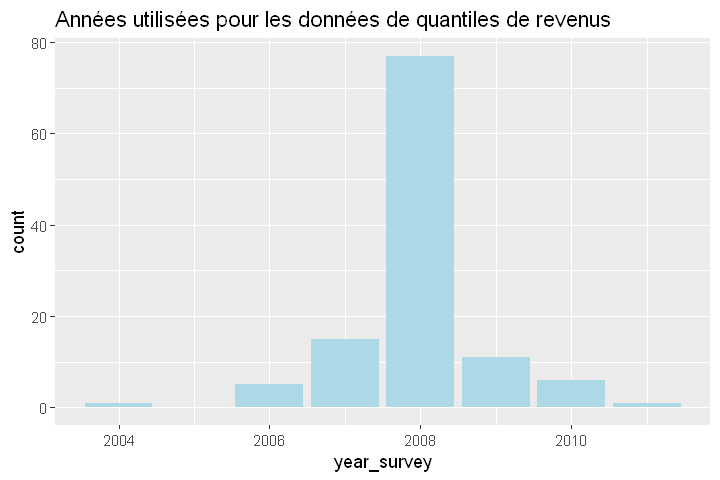

In [19]:
plot_annees <- ggplot(data, aes(x = year_survey)) + 
  geom_bar(fill="lightblue") +
  ggtitle("Années utilisées pour les données de quantiles de revenus")
plot_annees

- La majorité des données pour les quantiles de revenus datent de 2008. Les années utilisées vont de 2004 à 2011.

- Les indices de Gini utilisés sont pour chaque pays celui de la dernière année où l'indice est disponible ( d'après les données de la Banque Mondiale.

- Les données de population sont les valeurs de l'année 2008, pour être cohérentes avec la majorité des données de quantiles de revenus.

### Nombre de pays présents : 

In [20]:
count(data)

n
116


- L'échantillon contient 116 pays.

### Population couverte par l'analyse (en termes de pourcentage de la population mondiale) :

In [21]:
#on calcule la somme des populations des pays de l'échantillon
pop_echantillon <- sum(data$pop_2008)

#on rapporte cette valeur à la population mondiale (celle de 2008)
pop_couverte <- pop_echantillon / pop_tot_2008

print(paste('Population couverte par l\'échantillon : ', round(pop_couverte * 100, 2), '% de la population mondiale.'))

[1] "Population couverte par l'échantillon :  91.81 % de la population mondiale."


### Quantiles de la World Income Distribution : de quels quantiles s'agit-il ?

- Il s'agit ici de centiles : la population de chaque pays est divisée en 100 centiles de revenu de taille égale

### Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ?


- Oui, l'analyse des quantiles est une bonne méthode puisqu'elle permet d'étudier des classes de revenu de tailles égale. Cela permet donc d'analyser la répartition des revenus, et de pouvoir faire des comparaisons entre différents pays ayant un nombre d'habitants différent.

### $PPP :

- La parité de pouvoir d'achat (purchasing power parity)  permet de mesurer combien une monnaie permet d’acheter de biens et services en fonction du niveau des prix dans le pays considéré. Cette mesure se base sur un panier de biens universel, et permet de comparer les revenus entre les habitants de pays différents.

## MISSION 2

In [22]:
#Selection des pays à comparer. On affiche les pays qui disposent d'assez de données pour l'indice de Gini à partir de 1980

#on ajoute une colonne comptant le nombre de NA dans le df indices_gini (depuis 1980)
indices_gini$nbre_na <- apply(indices_gini[tail(seq_along(indices_gini),41)], 1, function(x) sum(is.na(x)))
                              
head(indices_gini[order(indices_gini$nbre_na),], 50)

,Country.Name,country,Indicator.Name,Indicator.Code,X1960,X1961,X1962,X1963,X1964,X1965,...,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019,X,nbre_na
28,Brazil,BRA,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,53.5,52.8,52.1,51.9,53.3,53.3,53.9,NA,NA,7
47,Costa Rica,CRI,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,48.6,49.3,48.6,48.4,48.7,48.3,48.0,NA,NA,9
8,Argentina,ARG,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,41.4,41.0,41.7,NA,42.0,41.2,41.4,NA,NA,11
96,Honduras,HND,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,56.1,52.6,50.4,49.6,51.1,50.5,52.1,NA,NA,12
105,Indonesia,IDN,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,41.1,41.5,40.8,41.0,39.9,39.4,39.0,NA,NA,15
184,Panama,PAN,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,51.7,51.5,50.5,50.8,50.4,49.9,49.2,NA,NA,16
58,Dominican Republic,DOM,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,46.1,47.7,44.3,45.2,45.7,42.2,43.7,NA,NA,17
201,Russian Federation,RUS,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,40.7,40.9,39.9,37.7,36.8,37.2,37.5,NA,NA,17
210,El Salvador,SLV,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,41.8,43.4,41.6,40.6,40.0,38.0,38.6,NA,NA,17
232,Thailand,THA,GINI index (World Bank estimate),SI.POV.GINI,NA,NA,NA,NA,NA,NA,...,39.3,37.8,37.0,36.0,36.9,36.5,36.4,NA,NA,17


#### Pays sélectionnés : 

- Brésil (BRA)

- Allemagne (DEU)

- Norvège (NOR)

- France (FRA)

- Slovénie (SVN)

- Thailande (THA)

### Distribution de revenus :

- graphique de distribution des centiles en échelle logarithmique pour les pays sélectionnés:

In [23]:
#on crée un df data_pays contenant les quantiles
liste_pays <- c('BRA', 'FRA', 'SVN', 'DEU', 'NOR', 'THA') #liste des pays à comparer
data_pays <- data %>% filter(country %in% liste_pays) #filtre des pays sélectionnés
rownames(data_pays) <- data_pays$country #reset index
data_pays <- subset(data_pays, select = -c(country, year_survey, nb_quantiles, gdpppp, pop_2008, last_gini) ) # on ne conserve que les quantiles
data_pays <- t(data_pays) #on transpose pour avoir les pays en colonne
data_pays <- data.frame(data_pays[,'BRA'], data_pays[,'DEU'],
                        data_pays[,'FRA'], data_pays[,'SVN'],
                        data_pays[,'NOR'], data_pays[,'THA'],stringsAsFactors=FALSE)
colnames(data_pays) <- liste_pays
data_pays$quantile = seq(1:100) #ajout colonne quantile

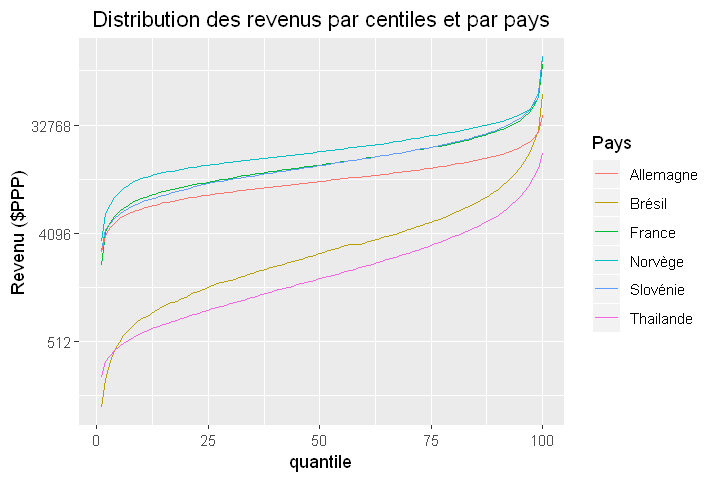

In [24]:
#graphique de distribution
plot_distrib_centiles <- ggplot(data_pays, aes(quantile, colour = Pays)) + 
  geom_line(aes(y = BRA, colour = "Brésil")) + 
  geom_line(aes(y = FRA, colour = "France")) +
  geom_line(aes(y = SVN, colour = "Slovénie")) + 
  geom_line(aes(y = DEU, colour = "Allemagne")) +
  geom_line(aes(y = NOR, colour = "Norvège")) + 
  geom_line(aes(y = THA, colour = "Thailande")) +
  scale_y_continuous(trans='log2') +
  ylab("Revenu ($PPP)") +
  ggtitle("Distribution des revenus par centiles et par pays") +
  theme(plot.title = element_text(hjust = 0.5))

plot_distrib_centiles

### Courbe de Lorenz :

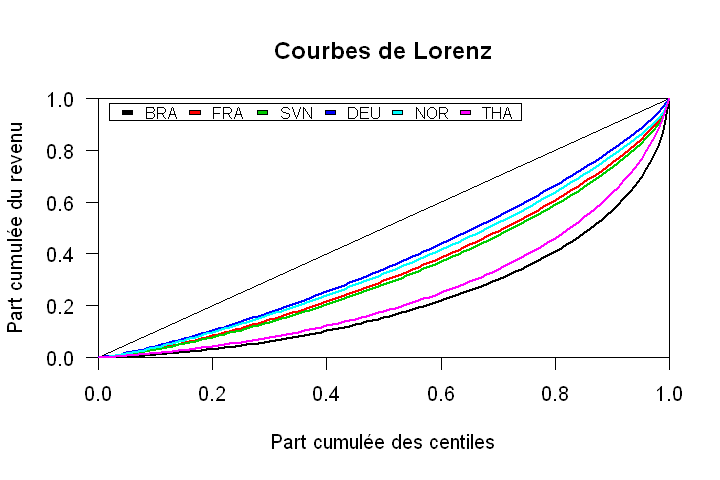

In [25]:
#création des valeurs pour les courbes
Lc_BRA <- Lc(data_pays$BRA)
Lc_FRA <- Lc(data_pays$FRA)
Lc_SVN <- Lc(data_pays$SVN)
Lc_DEU <- Lc(data_pays$DEU)
Lc_NOR <- Lc(data_pays$NOR)
Lc_THA <- Lc(data_pays$THA)

# affichage des courbes
plot(Lc_BRA, main= 'Courbes de Lorenz', xlab="Part cumulée des centiles", ylab="Part cumulée du revenu")
lines(Lc_FRA, col = 2)
lines(Lc_SVN, col = 3)
lines(Lc_DEU, col = 4)
lines(Lc_NOR, col = 5)
lines(Lc_THA, col = 6)
legend(0.02, 0.98, legend=liste_pays, fill = (1:6), horiz=TRUE, cex = 0.8)

### Evolution de l'indice de Gini au fil du temps :

In [26]:
gini_pays <- indices_gini %>% filter(country %in% liste_pays) #filtre des pays sélectionnés

#on filtre les colonnes pour obtenir des années avec assez de données
cols <- c(2, 30:61)
gini_pays <- gini_pays[,cols]

#on reset l'index
rownames(gini_pays) <- gini_pays$country 
gini_pays <- gini_pays[,-1]

#on transpose pour avoir les pays en colonne
gini_pays <- t(gini_pays)

#on recrée un dataframe pour avoir les données au bon format
gini_pays <- data.frame(gini_pays[,'BRA'], gini_pays[,'DEU'],
                        gini_pays[,'FRA'], gini_pays[,'SVN'],
                        gini_pays[,'NOR'], gini_pays[,'THA'],stringsAsFactors=FALSE)
colnames(gini_pays) <- liste_pays

#ajout colonne annee
gini_pays$annee <- rownames(gini_pays)
gini_pays$annee <- substr(gini_pays$annee, 2, 5)
gini_pays$annee <- as.numeric(gini_pays$annee)

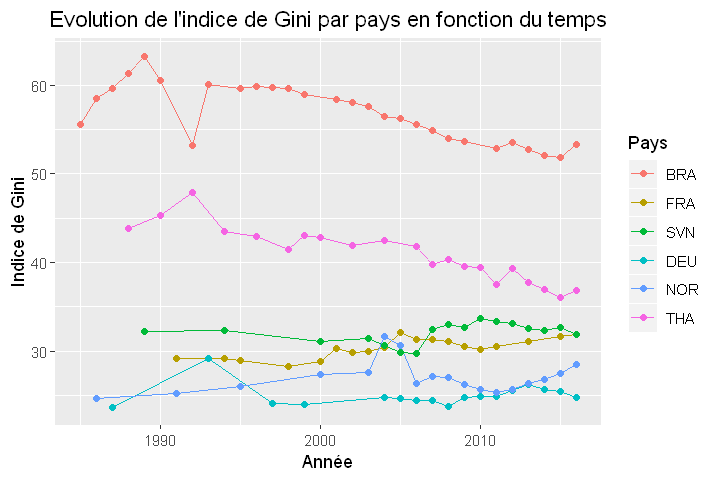

In [27]:
#affichage de l'évolution des indices

#on crée un df au format long pour faciliter l'affichage et on omet les valeurs manquantes
gini_pays_long <- melt(gini_pays, id.var='annee')
gini_pays_long <- na.omit(gini_pays_long)

#graph
plot_evol_gini <- ggplot(gini_pays_long, aes(x=annee, y=value, color=variable)) + 
  geom_line() + geom_point() +
  xlab("Année") + ylab("Indice de Gini") +
  ggtitle("Evolution de l'indice de Gini par pays en fonction du temps") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(color = "Pays")
plot_evol_gini

### Classement des pays par indice de Gini  :

#### Indice moyen de l'échantillon

In [28]:
gini_moyen <- mean(data$last_gini)
print('Indice de Gini moyen:')
round(gini_moyen,2)

[1] "Indice de Gini moyen:"


[1] 37.1

#### 5 pays ayant l'indice de Gini le plus élevé

In [29]:
head(data[order(-data$last_gini),] %>% select(country, last_gini),5)

,country,last_gini
116,ZAF,63.0
58,KHM,56.8
15,CAF,56.2
100,SWZ,54.6
74,MOZ,54.0


Pays avec l'indice de Gini le plus élevé:

- Afrique du Sud

- Cambodge

- République Centre Africaine

- Eswatini

- Mozambique

#### 5 pays ayant l'indice de Gini le plus faible

In [30]:
head(data[order(data$last_gini),] %>% select(country, last_gini),5)

,country,last_gini
98,SVN,24.2
25,CZE,24.9
11,BLR,25.2
97,SVK,25.2
67,MDA,25.7


Pays avec l'indice de Gini le plus faible:

- Slovénie

- République Tchèque

- Biélorussie

- Slovaquie

- Moldavie

 #### Indice de Gini de la France :

In [31]:
data[data$country == 'FRA',] %>% select(country, last_gini)

,country,last_gini
35,FRA,31.6


##  MISSION 3

## A - Obtention des coefficients d'élasticité

In [32]:
#import data GDIM pour avoir les coefficients d'élasticité
gdim <- read.table("GDIM.csv", sep=",", header=TRUE, dec = '.')

In [33]:
#on filtre les pays n'ayant pas de données pour le coefficient
gdim <- gdim[!is.na(gdim['IGEincome']),]

#on supprime les duplicates pour avoir une ligne par pays
gdim <- gdim[!duplicated(gdim$iso3), ]
gdim <- gdim %>% select(iso3, IGEincome)
colnames(gdim) <- c('country', 'coeff_mobilite')

In [34]:
#on merge le df data avec le df gdim
data <- merge(x = data, y = gdim, by = "country", all.x = TRUE)

In [35]:
#on count les pays pour lesquels il n'y a pas de coeff d'élasticité
count(data[rowSums(is.na(data)) > 0,][,c('country','coeff_mobilite')])

n
50


- On utilise les coefficients extrapolés par région du monde pour ces 50 pays.

In [36]:
#import d'un fichier contenant les iso pays et leurs régions associés
continents <- read.csv("continents.csv", sep=",", header=TRUE )
continents <- continents[,c('alpha.3', 'sub.region')]

#on crée un df contenant les régions, et on ajoute une colonne contenant les coeff. de chaque region respective
regions <- unique(as.character(continents$sub.region))
regions <- data.frame(regions,stringsAsFactors=FALSE)
colnames(regions) <- 'region'
regions$coeff_mobilite <- 0 #on crée la colonne coeff_mobilite

In [37]:
#ajout manuel des coefficients par région, à partir des données du fichier elasticity.txt
regions[regions$region == 'Southern Asia', 'coeff_mobilite'] = 0.5
regions[regions$region == 'Northern Europe', 'coeff_mobilite'] = 0.2
regions[regions$region == 'Southern Europe', 'coeff_mobilite'] = 0.4
regions[regions$region == 'Northern Africa', 'coeff_mobilite'] = 0.66
regions[regions$region == 'Polynesia', 'coeff_mobilite'] = 0.5
regions[regions$region == 'Sub-Saharan Africa', 'coeff_mobilite'] = 0.66
regions[regions$region == 'Latin America and the Caribbean', 'coeff_mobilite'] = 0.66
regions[regions$region == 'Western Asia', 'coeff_mobilite'] = 0.5
regions[regions$region == 'Australia and New Zealand', 'coeff_mobilite'] = 0.4
regions[regions$region == 'Western Europe', 'coeff_mobilite'] = 0.4
regions[regions$region == 'Eastern Europe', 'coeff_mobilite'] = 0.4
regions[regions$region == 'Northern America', 'coeff_mobilite'] = 0.4
regions[regions$region == 'South-eastern Asia', 'coeff_mobilite'] = 0.5
regions[regions$region == 'Eastern Asia', 'coeff_mobilite'] = 0.5
regions[regions$region == 'Melanesia', 'coeff_mobilite'] = 0.5
regions[regions$region == 'Micronesia', 'coeff_mobilite'] = 0.5
regions[regions$region == 'Central Asia', 'coeff_mobilite'] = 0.5

In [38]:
#on merge les df contenant les infos pays et les coeff
colnames(continents) <- c('country', 'region')
continents <- merge(x = continents, y = regions, by = "region", all.x = TRUE)
colnames(continents) <- c('region', 'country', 'coeff_mobilite_extrap')

#on merge le df principal au df continents contenant les coeff
data <- merge(x = data, y = continents[,c('country','coeff_mobilite_extrap')], by = "country", all.x = TRUE)

In [39]:
#on remplace les na de la colonne 'coeff_mobilite' par les coeff extrapolés
data$coeff_mobilite <- ifelse(is.na(data$coeff_mobilite), data$coeff_mobilite_extrap, data$coeff_mobilite)
data$coeff_mobilite_extrap <- NULL

#on verifie si il reste des pays avec valeurs nulles
data[rowSums(is.na(data)) > 0,][,c('country','coeff_mobilite')]

,country,coeff_mobilite
114,XKX,NA


In [40]:
#on remplace manuellement la valeur du coefficient pour le Kosovo
data[data$country == 'XKX','coeff_mobilite'] <- 0.4

## B - Géneration aléatoire de la classe de revenu des parents

### a) Pas à pas pour un seul pays, avec 10 classes de revenus

In [41]:
#donnees tests
data_test <- data[1,] # un seul pays
pj <- data_test$coeff_mobilite
print(pj)

[1] 0.8158745


In [42]:
#definition du nombre de quantiles
nb_quantiles <- 10
#taille de l'échantillon
n <- nb_quantiles * 1000 #A CHANGER PAR 1000

#### Q1, Q2, Q3

In [43]:
#generation des n revenus selon la loi normale

generate_incomes <- function(n, pj) 
{
    #generation aleatoire des revenus selon une loi normale (mean et std non pertinents)
    
    ln_y_parents <- rnorm(n)
    #generation aleatoire des residus selon une loi normale centree reduite
    residus <- rnorm(n, 0, 1)
    result <- list('y_child' = exp((pj * ln_y_parents) + residus), 'y_parent' = exp(ln_y_parents))
    return(result)
}

#calcul de y_child et y_parent
y <- generate_incomes(n, pj)
y_child <- unlist(y['y_child'], use.names=FALSE)
y_parents <- unlist(y['y_parent'], use.names=FALSE)

#### Q4

In [44]:
#calcul des classes de revenus

quantiles <- function(l, nb_quantiles)
{
    #renvoie un dataframe contenant les n valeurs de l et leur classe (quantile) associé
    size <- length(l)
    l_sorted <- cbind(l)
    l_sorted <- sort(l)
    quantiles = round(seq(1, nb_quantiles + 1 , nb_quantiles /size) - 0.5 + (1/size))
    quantiles <- quantiles[1:(length(quantiles)-1)]
    q_list <- quantiles
    names(q_list) <- l_sorted
    df_l <-data.frame(l)
    colnames(df_l) <- 'l'
    df_q <-data.frame(q_list)
    df_q <- tibble::rownames_to_column(df_q, 'l')
    df <- merge(x = df_l, y = df_q, by = "l", all.x = TRUE, sort = FALSE)
    colnames(df) <- c('l','c_i')
    return(df)
}

compute_quantiles <- function(y_child, y_parents, nb_quantiles)
{
    #renvoie un dataframe contenant y_child, y_parent, c_i_child, c_i_parent
    df_child <- quantiles(y_child, nb_quantiles)
    colnames(df_child) <- c('y_child', 'c_i_child')
    df_parents <- quantiles(y_parents, nb_quantiles)
    colnames(df_parents) <- c('y_parents', 'c_i_parents')
    sample <- data.frame(df_child, df_parents, stringsAsFactors=FALSE)
    return(sample)
}

sample <- compute_quantiles(y_child, y_parents, nb_quantiles)

#### Q5

In [45]:
#distribution conditionnelle

distribution <- function(counts, nb_quantiles)
{
    distrib <- list()
    total <- sum(counts$counts)
    
    if (total == 0){
        return(rep(0, nb_quantiles))
    }
    
    for (q_p in seq(1, nb_quantiles)){
        subset <- filter(counts, c_i_parents == q_p)
        if (count(subset) > 0){
            nb <- subset$counts
        distrib <- append(distrib, nb/total)
        }else{
            distrib <- append(distrib, 0)
        }
    }
    return(distrib)
}


conditional_distributions <- function(sample, nb_quantiles)
{
    #renvoie une matrice contenant les probabilités conditionnelles
    counts <- count(sample, c_i_child, c_i_parents)
    colnames(counts) <- c('c_i_child', 'c_i_parents', 'counts')
    
    mat <- list()
    for(child_quantile in seq(nb_quantiles)){
        subset <- filter(counts, c_i_child == child_quantile)
        mat <- cbind(mat, distribution(subset,nb_quantiles))
    }
    return(mat)
}

cd <-data.frame(conditional_distributions(sample, nb_quantiles))
cd <-data.frame(lapply(cd, function(x) unlist(x)))
colnames(cd) <- seq(nb_quantiles)
                        
proba_cond <- function(c_i_parents, c_i_child, mat)
{
    return(mat[c_i_child,c_i_parent])
}
                       
cd

1,2,3,4,5,6,7,8,9,10
0.437,0.210,0.129,0.088,0.055,0.044,0.020,0.012,0.003,0.002
0.210,0.185,0.157,0.121,0.133,0.076,0.047,0.039,0.024,0.008
0.122,0.161,0.163,0.156,0.114,0.102,0.088,0.048,0.035,0.011
0.084,0.146,0.149,0.107,0.126,0.127,0.095,0.084,0.060,0.022
0.060,0.090,0.129,0.145,0.127,0.114,0.118,0.113,0.075,0.029
0.041,0.092,0.091,0.122,0.134,0.116,0.122,0.125,0.093,0.064
0.027,0.059,0.081,0.093,0.103,0.129,0.150,0.137,0.120,0.101
0.013,0.037,0.050,0.095,0.096,0.115,0.143,0.147,0.160,0.144
0.005,0.015,0.039,0.054,0.074,0.113,0.126,0.173,0.197,0.204
0.001,0.005,0.012,0.019,0.038,0.064,0.091,0.122,0.233,0.415


#### Q6

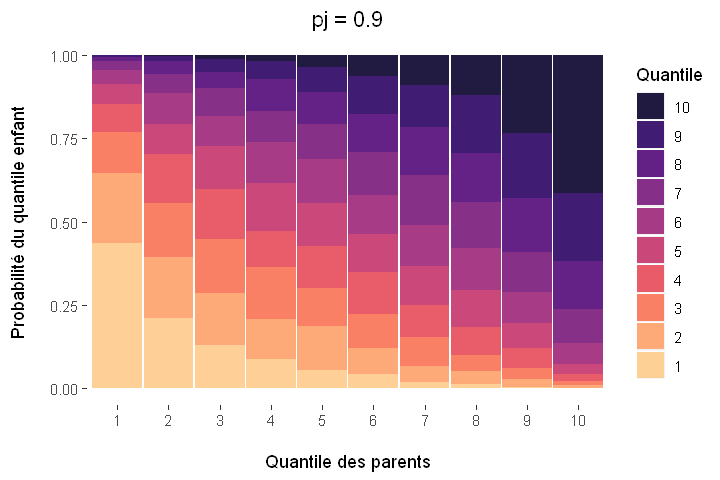

In [53]:
#affichage plot distributions conditionnelles

#options(repr.plot.width=7, repr.plot.height=4)

cd$row <- seq_len(nrow(cd))
cd_long <- melt(cd, id.vars = "row") #on applique la fonction melt sur la matrice pour afficher le plot

#fill=forcats::fct_rev(factor(row))
#width = 1, color = 'black', size = 0.1
ggplot(cd_long, aes(x = factor(variable), y = value, fill=forcats::fct_rev(factor(row)))) + 
  geom_bar(stat = "identity", alpha = 0.95, width = 0.97) +
  ggtitle("pj = 0.9") +
  xlab("\nQuantile des parents") + ylab("Probabilité du quantile enfant\n") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(fill = "Quantile", color = NULL) +
  #scale_x_discrete(breaks=seq(1,100,10) -1, labels = waiver()) +
  scale_fill_viridis_d(alpha = 0.95, begin = 0.1, end = 0.9,option = 'magma') +
  theme(axis.line = element_line(colour = "white"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) 

#### Q7 - Q8

In [47]:
#nouvel échantillon à partir de WID
#pour chaque pays j et son p_j associé, 500 individus répartis en 10 quantiles, avec distribution selon matrice précedente

#probleme d'arrondi : methode d'hamilton ? 

In [48]:
#on créé 499 clones (500 individus) du pays dans un dataframe
sample_pays = select(data[1,], c('gdpppp', 'last_gini'))
colnames(sample_pays) <- c('m_j', 'G_j')
sample_pays <- sample_pays[rep(seq_len(nrow(sample_pays)), 500), ]

#on crée les colonnes c_i_child (10 classes)
for (i in (1:nb_quantiles)){
    sample_pays[as.character(i)] <- NA
}

In [49]:
#allocation des c_i_parents

#on efface la colonne contenant les numero de quantiles
cd$row <- NULL


#fonction d'allocation
allocation <- function(ratios, k)
{
    #repartit les k elements selon les ratios passsés en argument
    results <- trunc(k*ratios)
    fractions <- k*ratios - trunc(k*ratios)
    reste <- trunc(k - sum(results))
    
    indices <- order(fractions)
    results[indices[0:reste]] = results[indices[0:reste]] + 1
    
    return(as.numeric(results))
}

#remplissage des c_i_parents
for (q_child in seq(nb_quantiles)){
    
    j<- 0
    q_parents <- 1
    
    for (nb_ind in allocation(cd[q_child,],500)){
        if (nb_ind != 0){
            sample_pays[j + seq(nb_ind),2 + q_child] <- q_parents
        }
        q_parents <- q_parents + 1
        j <- j + nb_ind
    }

}

In [50]:
#melt colonnes c_i_parents pour avoir une ligne par individu et par c_i_child
sample_pays$ind <- seq(1:500) 

sample_pays <-  melt(data = sample_pays, id.vars = c('ind', "m_j", "G_j"), measure.vars = colnames(sample_pays)[3:12])
colnames(sample_pays) <- c('ind', "m_j", "G_j", 'ci_child', 'c_i_parents')
sample_pays <- sample_pays[order(sample_pays[,'ind'], sample_pays[,'ci_child'], sample_pays[,'c_i_parents'] ),]

sample_pays$ind <- NULL
rownames(sample_pays) <- NULL

In [51]:
head(sample_pays,15)

m_j,G_j,ci_child,c_i_parents
7297,33.2,1,1
7297,33.2,2,1
7297,33.2,3,1
7297,33.2,4,1
7297,33.2,5,1
7297,33.2,6,1
7297,33.2,7,1
7297,33.2,8,1
7297,33.2,9,1
7297,33.2,10,2


### b) Algorithme pour generer l'échantillon complet (100 classes de revenus)

In [81]:
#definition du nombre de quantiles
nb_quantiles <- 100
#taille de l'échantillon
n <- nb_quantiles * 1000

#initialisation du df final
final_sample <- data.frame(m_j=double(),
                 G_j=double(),
                 c_i_child=double(),
                 c_i_parents=double(),
                 country=character(),
                 income_child=double(),
                 income_parents=double(),
                 stringsAsFactors=FALSE)


#ALGORITHME POUR TOUS LES PAYS
#length(data$country)
for (pays_j in seq(1)){
    pays <- pays_j
    pj <- data[pays,'coeff_mobilite']
    
    t0 <- proc.time() #TEST
    
    #calcul de y_child et y_parent
    y <- generate_incomes(n, pj)
    y_child <- unlist(y['y_child'], use.names=FALSE)
    y_parents <- unlist(y['y_parent'], use.names=FALSE)

    sample <- compute_quantiles(y_child, y_parents, nb_quantiles)

    cd <-data.frame(conditional_distributions(sample, nb_quantiles))
    cd <-data.frame(lapply(cd, function(x) unlist(x)))
    colnames(cd) <- seq(nb_quantiles)                      
    
    t1 <- proc.time() #TEST
    cat('t1',t1 - t0)                       
                           
    #on créé 499 clones (500 individus) du pays dans un dataframe
    sample_pays = select(data[1,], c('gdpppp', 'last_gini'))
    colnames(sample_pays) <- c('m_j', 'G_j')
    sample_pays <- sample_pays[rep(seq_len(nrow(sample_pays)), 500), ]                    

    t2 <- proc.time() #TEST
    cat('t2', t2 - t1)                            
                           
    #on crée les colonnes c_i_child (100 classes)
    for (i in (1:nb_quantiles)){
        sample_pays[as.character(i)] <- NA
    }
                           
    t3 <- proc.time() #TEST
    cat('t3',t3 - t2) 
                           
    #remplissage des c_i_parents
    for (q_child in seq(nb_quantiles)){

        alloc <- allocation(cd[q_child,],500)
        sample_pays[,2 + q_child] <- rep(seq(nb_quantiles),alloc)
    } 
    
    t4 <- proc.time() #TEST
    cat('t4',t4 - t3)                        
                           
    #melt colonnes c_i_parents pour avoir une ligne par individu et par c_i_child
    sample_pays$ind <- seq(1:500) 
    sample_pays <-  melt(data = sample_pays, id.vars = c('ind', "m_j", "G_j"), measure.vars = colnames(sample_pays)[3:102])
    colnames(sample_pays) <- c('ind', "m_j", "G_j", 'c_i_child', 'c_i_parents')
    sample_pays <- sample_pays[order(sample_pays[,'ind'], sample_pays[,'c_i_child'], sample_pays[,'c_i_parents'] ),]

    sample_pays$ind <- NULL
    rownames(sample_pays) <- NULL

    #ajout de la colonne pays                     
    sample_pays$country <- data[pays, 'country']
    
    t5 <- proc.time() #TEST
    cat('t5', t5 - t4)                        
                           
                           
    #ajout des colonnes de revenus enfant et parents
    sample_pays$income_child <- NA
    for (i in seq(nb_quantiles)){
        sample_pays[sample_pays$c_i_child == i, 'income_child'] <- data[pays,4+i]
        }

    sample_pays$income_parents <- NA
    for (i in seq(nb_quantiles)){
        sample_pays[sample_pays$c_i_parents == i, 'income_parents'] <- data[pays,4+i]
        }
    
    t6 <- proc.time() #TEST
    cat('t6',t6 - t5)                        
                           
    #ajout des données pour le pays j à l'échantillon final                       
    final_sample <- rbind(final_sample, sample_pays)
                           
}

write.csv(final_sample,"final_sample.csv", row.names = FALSE)

t1 8.08 0.09 8.17 NA NAt2 0 0 0 NA NAt3 0.01 0 0.02 NA NAt4 3.05 0 3.05 NA NAt5 0.02 0 0.01 NA NAt6 0.31 0 0.31 NA NA

In [67]:
a <- 2
cat('a',a)

a 2

In [70]:
rep(5,10)

[1] 5 5 5 5 5 5 5 5 5 5

In [80]:
for (pays_j in seq(1)){
    pays <- pays_j
    pj <- data[pays,'coeff_mobilite']
    
    
    #calcul de y_child et y_parent
    y <- generate_incomes(n, pj)
    y_child <- unlist(y['y_child'], use.names=FALSE)
    y_parents <- unlist(y['y_parent'], use.names=FALSE)

    sample <- compute_quantiles(y_child, y_parents, nb_quantiles)

    cd <-data.frame(conditional_distributions(sample, nb_quantiles))
    cd <-data.frame(lapply(cd, function(x) unlist(x)))
    colnames(cd) <- seq(nb_quantiles)                      
                    
                           
    #on créé 499 clones (500 individus) du pays dans un dataframe
    sample_pays = select(data[1,], c('gdpppp', 'last_gini'))
    colnames(sample_pays) <- c('m_j', 'G_j')
    sample_pays <- sample_pays[rep(seq_len(nrow(sample_pays)), 500), ]                    
                       
                           
    #on crée les colonnes c_i_child (100 classes)
    for (i in (1:nb_quantiles)){
        sample_pays[as.character(i)] <- NA
    }
                           
    #remplissage des c_i_parents
    for (q_child in seq(nb_quantiles)){

        alloc <- allocation(cd[q_child,],500)
        sample_pays[,2 + q_child] <- rep(seq(nb_quantiles),alloc)
    } 
}
sample_pays

,m_j,G_j,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
1,7297,33.2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.1,7297,33.2,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
1.2,7297,33.2,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
1.3,7297,33.2,1,1,1,1,1,1,1,1,...,4,4,4,5,5,4,4,4,4,4
1.4,7297,33.2,1,1,1,1,1,1,1,1,...,5,6,5,7,6,5,5,5,5,5
1.5,7297,33.2,1,1,1,1,1,1,1,1,...,6,7,6,8,7,6,6,6,6,6
1.6,7297,33.2,1,1,1,1,1,1,1,1,...,7,9,7,9,8,7,7,8,7,7
1.7,7297,33.2,1,1,1,1,1,1,1,1,...,9,11,8,15,9,8,8,9,8,8
1.8,7297,33.2,1,1,1,1,1,1,1,1,...,10,12,9,16,11,9,9,10,9,9
1.9,7297,33.2,1,1,1,1,1,1,1,1,...,11,13,11,16,12,10,10,11,10,10


In [73]:
c(rep(10,2),rep(4,3))

[1] 10 10  4  4  4

In [77]:
rep(seq(nb_quantiles),alloc)

[1] 500